In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd
sys.path.append('../src')
import lcp
from sklearn.linear_model import LogisticRegression

# train 3 models

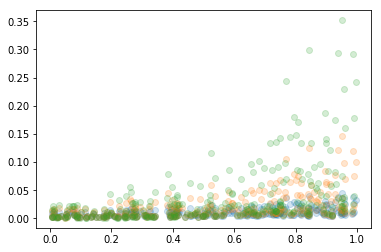

In [2]:
np.random.seed(13)
N = 300
p = 10
X = np.random.rand(N, p)
X[:, 1] = (X[:, 1] > 0.5).astype(np.int32)
y = (X[:, 0] > 0.95).astype(np.int32) * (X[:, 1] > 0.5).astype(np.int32)

models = []
for class_weight in [0.5, 1, 2]:
    m = LogisticRegression(solver='lbfgs', random_state=13, class_weight={0: 1, 1: class_weight})
    m.fit(X, y)
    plt.plot(X[:, 0], m.predict_proba(X)[:, 1], 'o', label=str(class_weight), alpha=0.2)
    models.append(deepcopy(m))

# model importances

In [3]:
np.random.seed(13)
x = np.random.rand(1, p)
x[:, 1] = 0
class_num = 1
strategy = 'independent' # gaussian_kde

**get feature importances**

In [22]:
explainer = lcp.Explainer(X, strategy=strategy)
explainer.explain_instance(x, models[1].predict_proba, class_num, return_table=True)

,contribution,sensitivity
x1,-0.012,0.031
x2,-0.002,-0.005
x6,-0.002,-0.01
x3,-0.001,-0.001
x8,-0,-0.002
x9,0,0
x5,0,-0.004
x7,0,0.001
x4,0.002,0.004
x0,0.003,0.017


**visualize a particular feature locally**

contribution: -0.012, sensitivity pos: nan
categorical nan 0.03072007051628372


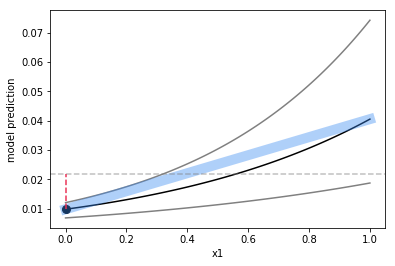

In [21]:
fig = plt.figure()
feature_num = 1
expl_dict = explainer.explain_instance_feature(x, models[1].predict_proba, feature_num, class_num)

ice_top = explainer.calc_ice_grid(x, models[0].predict_proba, feature_num)
ice_bot = explainer.calc_ice_grid(x, models[2].predict_proba, feature_num)

plt.plot(ice_top[0], ice_top[1][:, 1], color='gray')
plt.plot(ice_bot[0], ice_bot[1][:, 1], color='gray')
print(f'contribution: {expl_dict["contribution"]:0.3f}, sensitivity pos: {expl_dict["sensitivity_pos"]:0.3f}')

explainer.viz_expl_feature(expl_dict)

**visualize all features interactively**

In [20]:
expl_dict = explainer.explain_instance(x, models[1].predict_proba, class_num, return_table=False)
explainer.viz_expl(expl_dict, filename='out.html')